# Ejercicio 8

Utilizando el archivo Iris.csv que contiene información referida a la longitud y al ancho de sépalos y pétalos de tres especies de flores: iris setosa, iris versicolor e iris virginica.


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

DATA_PATH="./Data/"

data=pd.read_csv(DATA_PATH+'Iris.csv')

X = data.drop('class', axis=1)
T = data['class']

binarizer = preprocessing.LabelBinarizer()
T = binarizer.fit_transform(T)

X=np.array(X)
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.2, random_state=42, stratify=T)


In [7]:
import tensorflow as tf

# Verifica si hay GPUs disponibles y configura para usar CUDA si es posible
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Configura TensorFlow para que use solo la memoria necesaria en la GPU
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    print("TensorFlow está configurado para usar CUDA (GPU).")
  except RuntimeError as e:
    print(e)
else:
  print("No se detectaron GPUs. TensorFlow usará la CPU.")

TensorFlow está configurado para usar CUDA (GPU).


# Inciso A

Entrenar un multiperceptrón que aprenda a clasificar las 3 clases de flores.


In [8]:
from keras import Sequential
from keras.layers import Input, Dense

model=Sequential([
  Input(shape=[4]),
  Dense(8, activation='tanh'),
  Dense(3, activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# display(model.summary())

Training accuracy (último epoch): 0.9583333134651184
Validation accuracy (último epoch): 0.9666666388511658
Test loss: 0.1985 - Test accuracy: 0.9667


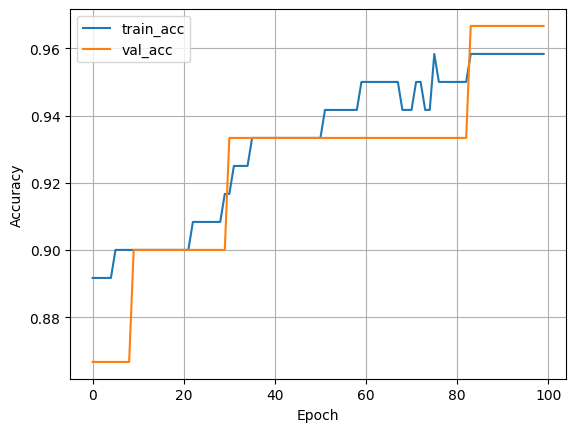

In [10]:
# Entrena y guarda el history (añade validation para ver val_accuracy)
history = model.fit(X_train, T_train, epochs=100, batch_size=32, validation_data=(X_test, T_test), verbose=0)

# Accuracy del último epoch
print("Training accuracy (último epoch):", history.history['accuracy'][-1])
if 'val_accuracy' in history.history:
  print("Validation accuracy (último epoch):", history.history['val_accuracy'][-1])

# Evaluación final en el test set
loss, acc = model.evaluate(X_test, T_test, verbose=0)
print(f"Test loss: {loss:.4f} - Test accuracy: {acc:.4f}")

# Graficar curva de accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train_acc')
if 'val_accuracy' in history.history:
  plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Inciso B

Utilice Python para calcular la matriz de confusión y calcule de forma manual las métricas de precision, recall, accuracy y f1-score.  
Luego utilice la función classification_report de SciKit-Learn para comparar los resultados.


In [15]:
from sklearn.metrics import confusion_matrix, classification_report

# Predicciones (probabilidades -> etiquetas)
y_true = np.argmax(T_test, axis=1)
y_pred_probs = model.predict(X_test, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)

# Matriz de confusión
labels = list(range(len(binarizer.classes_)))
cm = confusion_matrix(y_true, y_pred, labels=labels)
print("Matriz de confusión:\n", cm)

# Cálculo manual de métricas por clase
total = cm.sum()
print("\nMétricas por clase (manual):")
for i, cls in enumerate(binarizer.classes_):
  TP = cm[i, i]
  FP = cm[:, i].sum() - TP
  FN = cm[i, :].sum() - TP
  TN = total - TP - FP - FN

  precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
  recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
  accuracy = (TP + TN) / total
  f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0

  print(f"{cls}: precision={precision:.4f}, recall={recall:.4f}, accuracy={accuracy:.4f}, f1={f1:.4f}")

# Métricas globales a partir de la matriz
overall_accuracy = np.trace(cm) / total
print(f"\nAccuracy global (manual): {overall_accuracy:.4f}")

# Comparación con classification_report de scikit-learn
print("\nClassification report (sklearn):")
print(classification_report(y_true, y_pred, target_names=binarizer.classes_))

Matriz de confusión:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Métricas por clase (manual):
Iris-setosa: precision=1.0000, recall=1.0000, accuracy=1.0000, f1=1.0000
Iris-versicolor: precision=1.0000, recall=0.9000, accuracy=0.9667, f1=0.9474
Iris-virginica: precision=0.9091, recall=1.0000, accuracy=0.9667, f1=0.9524

Accuracy global (manual): 0.9667

Classification report (sklearn):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

